# Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/DADV/assignments/IMDB/data/titleRatings.tsv", delimiter = '\t')

In [3]:
ratings.to_csv("/Users/pemawangmo/Desktop/DS_Notes/DADV/assignments/IMDB/data/titleRatings.csv")

In [4]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
1,tt0000002,6.1,207
2,tt0000003,6.5,1389
3,tt0000004,6.2,123
4,tt0000005,6.2,2177


In [5]:
basics_movie = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/DADV/assignments/IMDB/data/titleBasics.tsv", delimiter = '\t')

/Users/pemawangmo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
basics_movie.to_csv("/Users/pemawangmo/Desktop/DS_Notes/DADV/assignments/IMDB/data/titleBasics.csv")

In [7]:
basics_movie.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [8]:
basics_movie.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [9]:
basics_movie['startYear'] = pd.to_numeric(basics_movie['startYear'], errors='coerce')

In [10]:
basics_movie.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [11]:
year = basics_movie[(basics_movie.startYear >= 2000) & (basics_movie.startYear <= 2009)]
year

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N
18037,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short"
33811,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001.0,\N,20,Short
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
63462,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime"
...,...,...,...,...,...,...,...,...,...
7451413,tt9916794,tvEpisode,Episode #2.33,Episode #2.33,0,2009.0,\N,\N,"Action,Drama,Family"
7451414,tt9916796,tvEpisode,Episode #2.34,Episode #2.34,0,2009.0,\N,\N,"Action,Drama,Family"
7451415,tt9916798,tvEpisode,Episode #2.36,Episode #2.36,0,2009.0,\N,\N,"Action,Drama,Family"
7451416,tt9916800,tvEpisode,Episode #2.35,Episode #2.35,0,2009.0,\N,\N,"Action,Drama,Family"


In [12]:
year_rating_merged = pd.merge(year, ratings, on='tconst')
year_rating_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
1,tt0018295,short,El puño de hierro,El puño de hierro,0,2004.0,\N,40,"Action,Drama,Short",6.7,30
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78627
3,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",7.0,172
4,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008.0,\N,90,Documentary,7.7,13


In [13]:
only_movies = year_rating_merged.loc[year_rating_merged['titleType'] == 'movie']
only_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78627
3,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",7.0,172
4,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008.0,\N,90,Documentary,7.7,13
5,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.4,273
...,...,...,...,...,...,...,...,...,...,...,...
251595,tt9856558,movie,Magnus Lindberg - den siste rockpoeten,Magnus Lindberg - den siste rockpoeten,0,2005.0,\N,59,Biography,1.0,5
251611,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002.0,\N,57,Sci-Fi,5.0,5
251612,tt9876412,movie,Star Trek: The Final Darkness,Star Trek: The Final Darkness,0,2004.0,\N,85,Sci-Fi,4.4,5
251625,tt9881364,movie,Gaja,Gaja,0,2008.0,\N,\N,"Action,Comedy,Romance",7.3,24


In [14]:
popular_movie = only_movies.sort_values('numVotes', ascending = False)

In [15]:
print(popular_movie.head(10)['averageRating'].mean())

8.580000000000002


# Find the year in the 1900s when the average rank increased the most, compared to the previous year.(Ignore movies with votes < 1000)

In [16]:
votes = ratings[ratings['numVotes'] > 1000]
votes

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
2,tt0000003,6.5,1389
4,tt0000005,6.2,2177
7,tt0000008,5.4,1840
9,tt0000010,6.9,6137
...,...,...,...
1104420,tt9900782,8.5,10761
1104505,tt9904802,4.8,1084
1104551,tt9906260,9.9,32869
1104605,tt9908860,6.9,1518


In [17]:
votes_merged = pd.merge(votes, basics_movie, on = 'tconst')

In [18]:
year = votes_merged[(votes_merged['startYear'] >= 1900) & (votes_merged['startYear'] < 2000)]

In [19]:
year_output = year.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()

In [20]:
flag = 0
final_yr = 0
for i in range(1, len(year_output)):
    a = year_output.loc[i, 'avgR']
    b = year_output.loc[i-1, 'avgR']
    temp = abs(a - b)
    if temp > flag:
        flag = temp
        final_yr = year_output.loc[[i], ['startYear']]
final_yr

,startYear
3,1903.0


# Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes < 1000.)


In [21]:
rating_merged = pd.merge(ratings, basics_movie, on = 'tconst')
rating_merged

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1668,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,6.1,207,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,6.5,1389,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.2,123,short,Un bon bock,Un bon bock,0,1892.0,\N,12,"Animation,Short"
4,tt0000005,6.2,2177,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1104892,tt9916580,7.2,5,tvEpisode,Horrid Henry Horrid Boy?,Horrid Henry Horrid Boy?,0,2012.0,\N,10,"Animation,Comedy,Family"
1104893,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012.0,\N,\N,"Animation,Comedy,Family"
1104894,tt9916720,6.1,68,short,The Nun 2,The Nun 2,0,2019.0,\N,10,"Comedy,Horror,Mystery"
1104895,tt9916766,6.9,15,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,\N,43,"Family,Reality-TV"


In [22]:
vote = rating_merged[rating_merged['numVotes']>= 1000]
vote

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1668,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
2,tt0000003,6.5,1389,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
4,tt0000005,6.2,2177,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
7,tt0000008,5.4,1840,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
9,tt0000010,6.9,6137,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1104420,tt9900782,8.5,10761,movie,Kaithi,Kaithi,0,2019.0,\N,145,"Action,Thriller"
1104505,tt9904802,4.8,1084,movie,Enemy Lines,Enemy Lines,0,2020.0,\N,92,War
1104551,tt9906260,9.9,32869,tvEpisode,Hero,Hero,0,2019.0,\N,24,"Action,Adventure,Animation"
1104605,tt9908860,6.9,1518,tvSeries,Blown Away,Blown Away,0,2019.0,\N,23,Reality-TV


In [23]:
vote_output = vote.groupby('startYear').agg(avgR = ('averageRating', np.mean)).reset_index()

In [24]:
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
130,2016.0,7.164725
131,2017.0,7.182420
132,2018.0,7.135489
133,2019.0,7.214563


In [25]:
vote_output = vote_output[vote_output.startYear != 2013]
vote_output

,startYear,avgR
0,1874.0,6.900000
1,1878.0,7.400000
2,1887.0,5.200000
3,1888.0,6.500000
4,1890.0,5.000000
...,...,...
130,2016.0,7.164725
131,2017.0,7.182420
132,2018.0,7.135489
133,2019.0,7.214563


In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
x_train = vote_output['startYear'].values.reshape(-1,1)
y_train = vote_output['avgR'].values.reshape(-1,1)

In [28]:
model = LinearRegression().fit(x_train,y_train)

In [29]:
xtest = np.array([2013]).reshape(-1,1)
prediction = model.predict(xtest)
print(prediction)

[[7.00533832]]


In [30]:
# To visualize
import matplotlib.pyplot as plt  

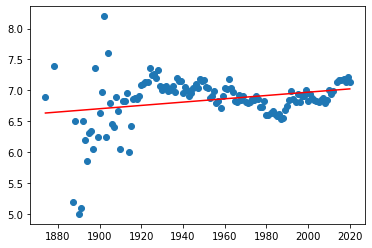

In [31]:
temp_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, temp_pred, color='red')
plt.show()

# Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?


In [32]:
corrl_year = basics_movie[(basics_movie['startYear']>= 1900) & (basics_movie['startYear'] < 2000)]

In [33]:
corrl_Data = pd.merge(ratings, corrl_year, on='tconst')
corrl_Data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000160,5.2,9,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900.0,\N,\N,"Drama,Short"
1,tt0000265,4.3,100,short,Above the Limit,Above the Limit,0,1900.0,\N,\N,"Comedy,Short"
2,tt0000269,4.9,100,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900.0,\N,\N,"Documentary,Short"
3,tt0000271,6.4,7,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900.0,\N,\N,Short
4,tt0000272,5.6,689,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
363793,tt9909834,7.2,6,video,Alice Cooper: Love's a Loaded Gun,Alice Cooper: Love's a Loaded Gun,0,1991.0,\N,5,"Music,Short"
363794,tt9909866,4.4,8,video,Nora,Nora,0,1985.0,\N,45,"Action,Adventure,Animation"
363795,tt9914702,6.8,13,tvEpisode,Episode dated 5 February 1988,Episode dated 5 February 1988,0,1988.0,\N,\N,\N
363796,tt9915946,6.2,6,movie,Nuestra película,Nuestra película,0,1993.0,\N,96,Documentary


In [34]:
years = list(corrl_Data['startYear'].unique())
correlation_year = pd.DataFrame()
for year in years:
    X=corrl_Data[corrl_Data['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    correlation_year = correlation_year.append(newRow, ignore_index=True)
correlation_year = correlation_year.reindex(columns=['Year', 'Correlation'])
correlation_year

,Year,Correlation
0,1900.0,0.215165
1,1901.0,0.215441
2,1904.0,0.237953
3,1903.0,0.172293
4,1902.0,0.198101
...,...,...
95,1999.0,0.029081
96,1998.0,0.022453
97,1994.0,0.034603
98,1997.0,0.021589


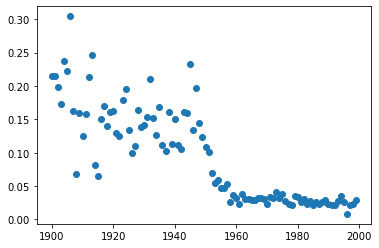

In [35]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(correlation_year['Year'],correlation_year['Correlation'])

<BarContainer object of 100 artists>

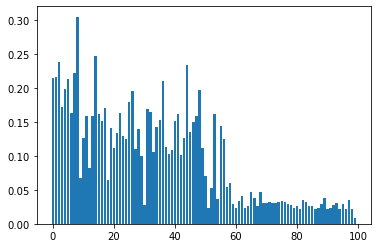

In [36]:
plt.bar(np.arange(len(correlation_year['Year'])), correlation_year['Correlation'])


# Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x-axis=votes, y-axis=rank)

In [37]:

movies_10000 = only_movies[only_movies["numVotes"] >= 10000]

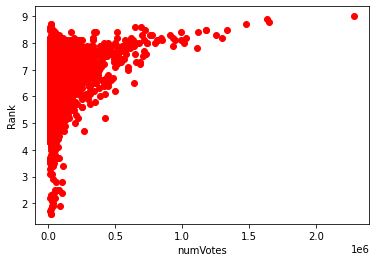

In [38]:
plt.scatter(movies_10000["numVotes"],movies_10000["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

# Using Tornado Templates, draw a bar graph of the number of movies by year since 1900


In [39]:
movies_since_1900 = only_movies[only_movies['startYear'] >= 1900]
movies_since_1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78627
3,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",7.0,172
4,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008.0,\N,90,Documentary,7.7,13
5,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.4,273
...,...,...,...,...,...,...,...,...,...,...,...
251595,tt9856558,movie,Magnus Lindberg - den siste rockpoeten,Magnus Lindberg - den siste rockpoeten,0,2005.0,\N,59,Biography,1.0,5
251611,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002.0,\N,57,Sci-Fi,5.0,5
251612,tt9876412,movie,Star Trek: The Final Darkness,Star Trek: The Final Darkness,0,2004.0,\N,85,Sci-Fi,4.4,5
251625,tt9881364,movie,Gaja,Gaja,0,2008.0,\N,\N,"Action,Comedy,Romance",7.3,24


In [40]:
movies_count = movies_since_1900.groupby(['startYear']).count()
movies_count

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
2000.0,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186
2001.0,3416,3416,3416,3416,3416,3416,3416,3416,3416,3416
2002.0,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568
2003.0,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708
2004.0,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102
2005.0,4546,4546,4546,4546,4546,4546,4546,4546,4546,4546
2006.0,5022,5022,5022,5022,5022,5022,5022,5022,5022,5022
2007.0,5267,5267,5267,5267,5267,5267,5267,5267,5267,5267
2008.0,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989


In [41]:
movies_count.reset_index(level=0, inplace=True)
movies_count

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,2000.0,3186,3186,3186,3186,3186,3186,3186,3186,3186,3186
1,2001.0,3416,3416,3416,3416,3416,3416,3416,3416,3416,3416
2,2002.0,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568
3,2003.0,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708
4,2004.0,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102
5,2005.0,4546,4546,4546,4546,4546,4546,4546,4546,4546,4546
6,2006.0,5022,5022,5022,5022,5022,5022,5022,5022,5022,5022
7,2007.0,5267,5267,5267,5267,5267,5267,5267,5267,5267,5267
8,2008.0,5989,5989,5989,5989,5989,5989,5989,5989,5989,5989
9,2009.0,6733,6733,6733,6733,6733,6733,6733,6733,6733,6733


In [42]:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

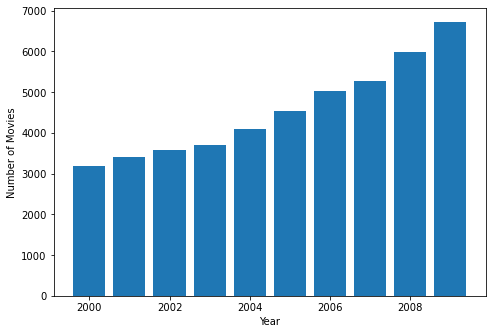

In [45]:
import io
import base64
import pdfcrowd

img = io.BytesIO()
bar_graph(movies_count['startYear'], movies_count['titleType'], img, "Year", "Number of Movies")
res = base64.b64encode(img.read()).decode("UTF-8")
with open("imdb_bargraph.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))

# Convert these files into PDF without using a browser

In [46]:
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('imdb_bargraph.html', 'imdb_bargraph.pdf')